Run face and object detection
```
docker run -e VISION-DETECTION=True -e VISION-FACE=True -e MODE=High -d \
      -v localstorage:/datastore -p 5000:5000 \
       --name deepstack deepquestai/deepstack:noavx
```

In [1]:
import requests
import json
from PIL import Image, ImageDraw

In [2]:
def draw_box(draw, prediction, text='', color=(255, 0, 0)):
    """Draw bounding box on image."""
    (left, right, top, bottom) = (prediction['x_min'], prediction['x_max'], prediction['y_min'], prediction['y_max'])
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=5, fill=color)
    if text:
        draw.text((left, abs(top-15)), text, fill=color)

In [3]:
def format_confidence(confidence):
    """Takes a confidence from the API like 
       0.55623 and returne 55.6 (%).
    """
    return round(float(confidence)*100, 1)

format_confidence(0.55623)

55.6

In [4]:
##IP_ADDR = 'localhost'
IP_ADDR = '192.168.1.90'
PORT = 80 # 5000
API_KEY =  None # "Mysecretkey"

## Face detection
https://deepstackpython.readthedocs.io/en/latest/facedetection.html

Register a face - this can take a long time

In [6]:
image_data = open("idris.jpg","rb").read()

response = requests.post(f"http://{IP_ADDR}:{PORT}/v1/vision/face/register",
                         files={"image":image_data}, 
                         data={"userid":"Idris Elba", "api_key":API_KEY})

ConnectionError: HTTPConnectionPool(host='192.168.1.90', port=5000): Max retries exceeded with url: /v1/vision/face/register (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7ff4ba4c3590>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [6]:
response.json()

{'success': True, 'message': 'face updated'}

Run a face detection - fast option

In [7]:
image_data = open("couple.jpg","rb").read()

response = requests.post(f"http://{IP_ADDR}:{PORT}/v1/vision/face",
                         files={"image":image_data},
                         data={"api_key":API_KEY})

In [8]:
response.json()

{'success': True,
 'predictions': [{'confidence': 0.9999846,
   'y_min': 162,
   'x_min': 1620,
   'y_max': 680,
   'x_max': 1982},
  {'confidence': 0.99997175,
   'y_min': 230,
   'x_min': 867,
   'y_max': 729,
   'x_max': 1199}]}

In [7]:
predictions = response.json()['predictions']

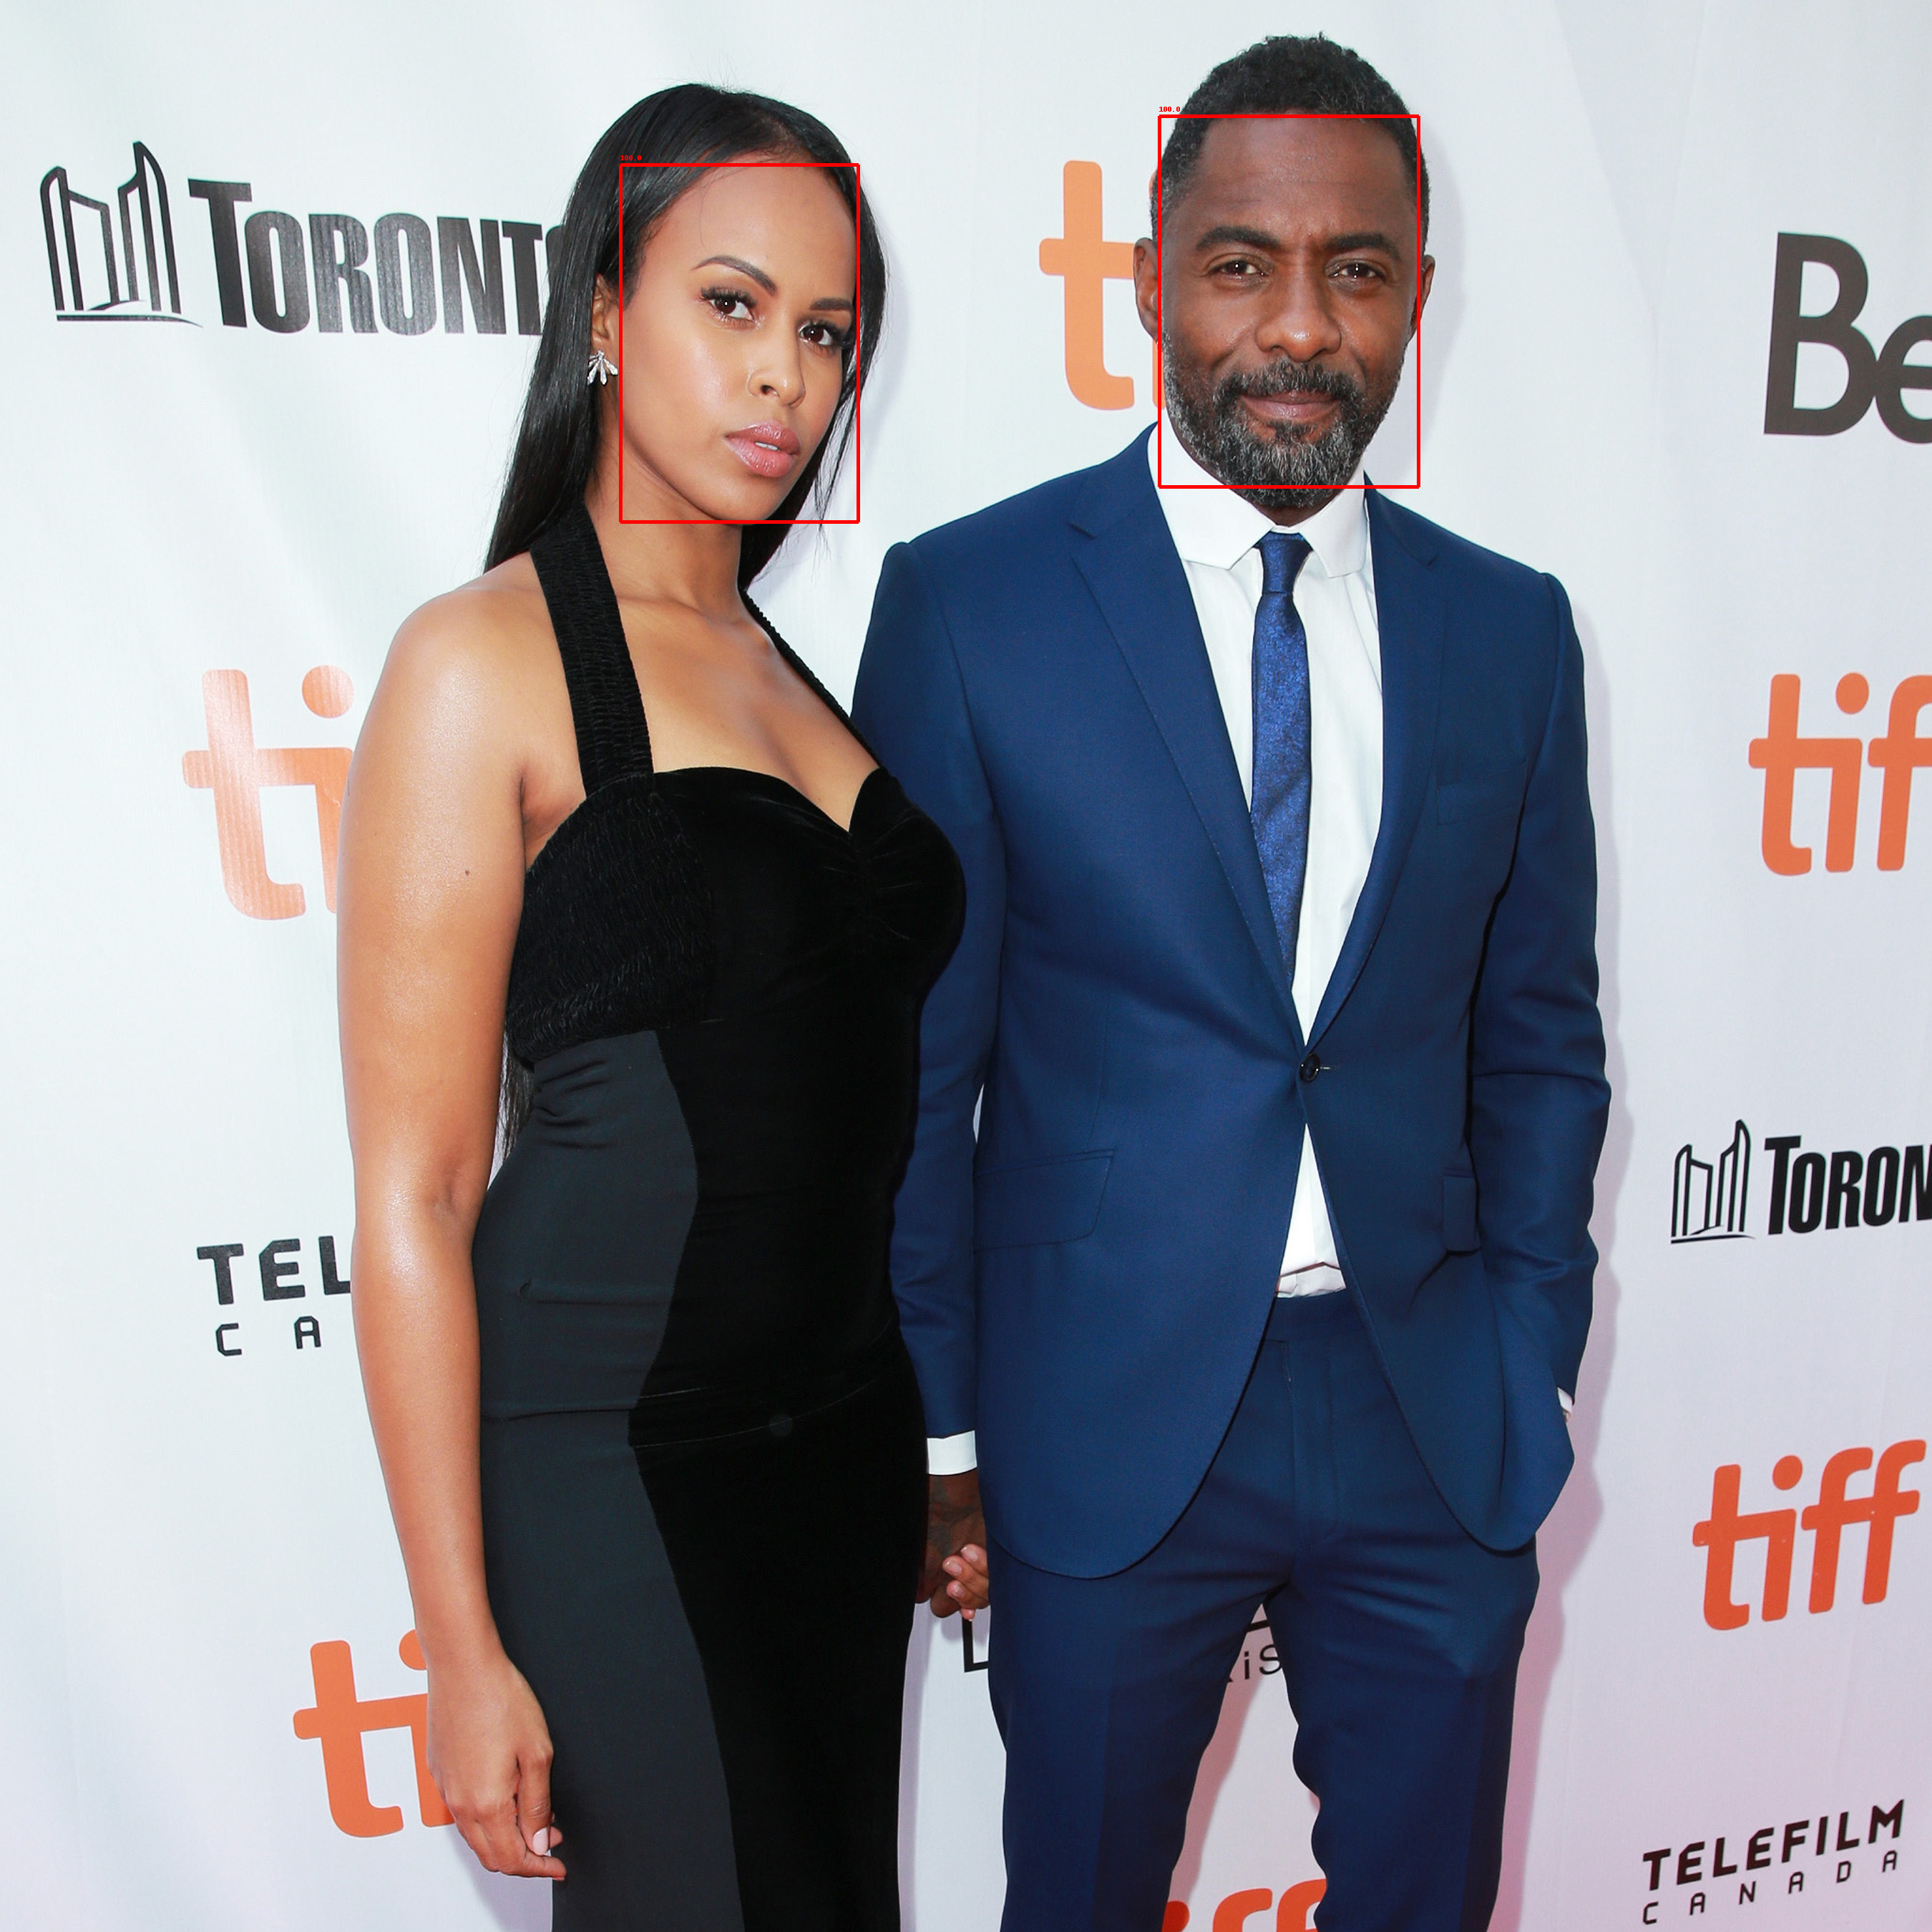

In [8]:
image = Image.open("couple.jpg")
draw = ImageDraw.Draw(image)

for prediction in predictions:
    prediction_confidence = format_confidence(prediction['confidence'])
    draw_box(draw, prediction, str(prediction_confidence))

display(image)

Run face recognition - this can also take a long time

In [ ]:
%%time
image_data = open("couple.jpg","rb").read()

response = requests.post(f"http://{IP_ADDR}:{PORT}/v1/vision/face/recognize", 
                         files={"image":image_data},
                         data={"api_key":API_KEY})

In [10]:
response.json()

{'success': True,
 'predictions': [{'confidence': 0.74734724,
   'userid': 'Idris Elba',
   'y_min': 162,
   'x_min': 1620,
   'y_max': 680,
   'x_max': 1982},
  {'confidence': 0,
   'userid': 'unknown',
   'y_min': 230,
   'x_min': 867,
   'y_max': 729,
   'x_max': 1199}]}

## Object detection
https://deepstackpython.readthedocs.io/en/latest/objectdetection.html

In [ ]:
ls

In [6]:
#%%time
img_file_test = "couple.jpg"

image_data = open(img_file_test,"rb").read()

response = requests.post(f"http://{IP_ADDR}:{PORT}/v1/vision/detection",
                         files={"image":image_data}, 
                         data={"api_key": API_KEY})

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
response

In [ ]:
response.json()

In [ ]:
predictions = response.json()['predictions']
predictions

In [ ]:
image = Image.open(img_file_test)
draw = ImageDraw.Draw(image)

for prediction in predictions:
    prediction_confidence = format_confidence(prediction['confidence'])
    draw_box(draw, prediction, str(prediction_confidence))

display(image)